## Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as sp
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import mne
import os
import sys
sys.path.append(os.path.abspath("../src"))
from functions import *


correct_counts = True

## Load pre/post-stim reference matrices + irrev values, load into the behavior dataframe

In [ ]:
project_directory = os.path.dirname(os.path.dirname(os.path.abspath("clean_analysis_dataset1")))

df = pd.read_csv(os.path.join(project_directory, r"data", r"eNeuro_data", r"behavior_eNeuro.csv"))

prestim_ref_mat = scipy.io.loadmat(os.path.join(project_directory, r"data", r"FowRev_long_192to255_tau5.mat"))['ref_mats']
poststim_ref_mat = scipy.io.loadmat(os.path.join(project_directory, r"data", r"FowRev_long_256to319_tau5.mat"))['ref_mats']
df['prestim_ref_mat'] = [prestim_ref_mat[i] for i in range(prestim_ref_mat.shape[0])]
df['prestim_irrev'] = df['prestim_ref_mat'].apply(lambda arr: np.mean(arr))
df['poststim_ref_mat'] = [poststim_ref_mat[i] for i in range(poststim_ref_mat.shape[0])]
df['poststim_irrev'] = df['poststim_ref_mat'].apply(lambda arr: np.mean(arr))

#df['stim_diff'] = (df['poststim_irrev'] - df['prestim_irrev'])

df['log_prestim'] = np.log(df['prestim_irrev'])
df['log_poststim'] = np.log(df['poststim_irrev'])


df.head()

,Unnamed: 0,subject,drug,session,block,miniblock,trial_nr,cue,location,cue_val,...,RT,total_trial,bl_pupil,bl_pupil_bin,prestim_ref_mat,prestim_irrev,poststim_ref_mat,poststim_irrev,log_prestim,log_poststim
0,0,1,DNP,0,1,0,316,1,1,1,...,700.413423,0,4357.233196,4,"[[0.0, 0.0006873881373122065, 0.00016213735834...",0.002365,"[[0.0, 0.0034406175735612415, 0.00032247166478...",0.004368,-6.046786,-5.433428
1,1,1,DNP,0,1,0,318,1,1,1,...,625.350154,1,4399.359772,4,"[[0.0, 0.040240608719263854, 0.000460120231847...",0.003315,"[[0.0, 0.011221204332762597, 3.11892070731507e...",0.007235,-5.709422,-4.928833
2,2,1,DNP,0,1,0,319,0,1,0,...,775.374966,2,4523.822666,4,"[[0.0, 0.00011810852016698719, 1.5823859782963...",0.002592,"[[6.933347799794049e-33, 0.0021569218713682363...",0.007527,-5.955156,-4.889197
3,3,1,DNP,0,1,0,320,1,1,1,...,700.344298,3,4433.337541,4,"[[0.0, 6.157323424213391e-05, 0.00035627791271...",0.003637,"[[0.0, 9.957067986210528e-07, 1.23841343919133...",0.003592,-5.616722,-5.629171
4,4,1,DNP,0,1,0,321,1,1,1,...,775.313991,4,4296.816038,3,"[[0.0, 0.005253544828395134, 0.001778205067022...",0.004256,"[[3.0814879110195774e-33, 0.012134126048785662...",0.006225,-5.459500,-5.079207


In [11]:
# prestim_channel_alpha = np.load(os.path.join(project_directory, r"data", r"prestim_channel_alphapower.npy"))
# prestim_mean_alpha = np.mean(prestim_channel_alpha, axis=1)
# df['prestim_mean_alpha'] = prestim_mean_alpha
# poststim_channel_alpha = np.load(os.path.join(project_directory, r"data", r"poststim_channel_alphapower.npy"))
# poststim_mean_alpha = np.mean(poststim_channel_alpha, axis=1)
# df['poststim_mean_alpha'] = poststim_mean_alpha

# df['trial'] = df.index

# pre_sampEn_bychannel_array = np.load(os.path.join(project_directory, r"data", r"prestim_sampEn_bychannel.npy"))
# list1 = [pre_sampEn_bychannel_array[i] for i in range(pre_sampEn_bychannel_array.shape[0])]
# df['prestim_sampen_bychannel'] = list1
# df['prestim_sampen_mean'] = df['prestim_sampen_bychannel'].apply(lambda x: np.mean(x))

# post_sampEn_bychannel_array = np.load(os.path.join(project_directory, r"data", r"poststim_sampEn_bychannel.npy"))
# list1 = [post_sampEn_bychannel_array[i] for i in range(post_sampEn_bychannel_array.shape[0])]
# df['poststim_sampen_bychannel'] = list1
# df['poststim_sampen_mean'] = df['poststim_sampen_bychannel'].apply(lambda x: np.mean(x))



# df['prestim_heirarchy'] = [np.std(matrix) for matrix in df['prestim_ref_mat']]
# # post -- 
# df['poststim_heirarchy'] = [np.std(matrix) for matrix in df['poststim_ref_mat']]

## Analysis used for thesis

### Prestim

#### All drugs combined

bl_pupil_bin
0    3306.142539
1    3485.883558
2    3588.134960
3    3691.694810
4    3877.785733
Name: bl_pupil, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\1444823354.py:24: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(1),('d')), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\1444823354.py:26: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(2),('d')), 0)


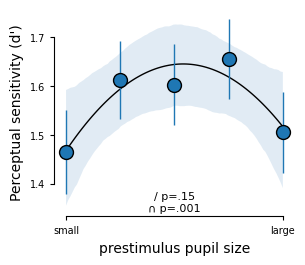

In [6]:
# ALL DRUGS COMBINED

# Loading behavioral data
behavior = df

cfg = {'n_bins': 5}  # Number of pupil bins
behavior['bl_pupil_bin'] = behavior.groupby(['subject', 'drug', 'block'])['bl_pupil'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

df_group = behavior.sort_values(by=['subject','session','block'])

        # make bins
df_group['bl_pupil_bin'] = np.concatenate(np.ravel(df_group.groupby(['subject','session','block'])['bl_pupil'].agg(
        lambda x: list(pd.qcut(x, cfg['n_bins'],labels = range(cfg['n_bins']))))))

correct_counts = True
df_sdt = df_group.groupby(['subject','drug','bl_pupil_bin']).apply(lambda x: sdt(x, correct_counts))

df_subject = df_sdt.groupby(['subject', 'bl_pupil_bin']).mean()
df_subject.reset_index(inplace=True)

print(behavior.groupby('bl_pupil_bin').mean()['bl_pupil'])

betas_first = dict()
_, betas_first['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(1),('d')), 0)
betas_second = dict()
_, betas_second['d'] = sp.stats.ttest_1samp(df_subject.groupby(['subject']).apply(run_model_pupilbin,(2),('d')), 0)


# Plotting results for d'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(8*cm, 7*cm))

ym = df_sdt.groupby('bl_pupil_bin').mean()['d']
yerr = df_sdt.groupby('bl_pupil_bin').sem()['d']
ax.errorbar(range(cfg['n_bins']), ym, yerr=yerr, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='k')

p_val_linear = betas_first['d']
p_val_quadratic = betas_second['d']

# Initialize variables to decide which model to plot
plot_linear = False
plot_quadratic = False

# Determine which model to plot based on the significance and smaller p-value
if p_val_linear < 0.05 or p_val_quadratic < 0.05:
    if p_val_linear < p_val_quadratic:
        plot_linear = True
    elif p_val_quadratic < p_val_linear:
        plot_quadratic = True

# Optionally add model fits if linear/quadratic fit was significant
if plot_linear:
    sns.regplot(ax=ax, data=df_subject, x="bl_pupil_bin", y="d", scatter=False, color=sns.color_palette('Set1', 2)[-1],
                line_kws={'linestyle': '-', 'lw': 1}, order=1, ci=68)
    # Adjusting line color to black for visibility
    ax.get_lines()[-1].set_color('k')

if plot_quadratic:
    sns.regplot(ax=ax, data=df_subject, x="bl_pupil_bin", y="d", scatter=False, color=sns.color_palette('Set1', 2)[-1],
                line_kws={'linestyle': '-', 'lw': 1}, order=2, ci=68)
    # Adjusting line color to black for visibility
    ax.get_lines()[-1].set_color('k')

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ {}\n∩ {}'.format(p_val_string(betas_first['d']),
                                        p_val_string(betas_second['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8)

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('Perceptual sensitivity (d\')')
ax.set_xlabel('prestimulus pupil size')
ax.set_xticks([0,cfg['n_bins']-1])
ax.set_xticklabels(['small', 'large']) 
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

fig.tight_layout()
plt.show()

#### By Drug

C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irrev'] = df['log_prestim']
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: PLC
Bin means: irreversibility_bin
0   -6.405918
1   -5.967482
2   -5.683321
3   -5.390723
4   -4.898950
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: DNP
Bin means: irreversibility_bin
0   -6.347280
1   -5.909399
2   -5.646773
3   -5.363004
4   -4.882768
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: ATX
Bin means: irreversibility_bin
0   -6.504525
1   -6.078766
2   -5.809444
3   -5.530069
4   -5.042101
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:55: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:58: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\3103041867.py:62: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in Sci

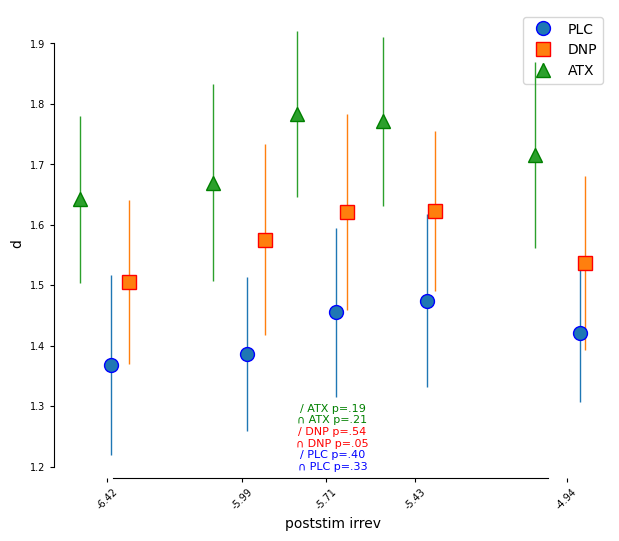

In [ ]:
behavior = df
#behavior = remove_top_percentile(behavior, 'prestim_mean_alpha', 0.999)
#behavior = remove_top_percentile(behavior, 'poststim_mean_alpha', 0.999)
behavior = behavior[(behavior['poststim_irrev'] < 0.075) & (behavior['prestim_irrev'] < 0.075)]

behavior['irrev'] = df['log_poststim']
cfg = {'n_bins': 5}  # Number of pupil bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['d'] < 0.05 or betas_second_irreversibility_plc['d'] < 0.05:
    if betas_first_irreversibility_plc['d'] < betas_second_irreversibility_plc['d']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['d'] < betas_first_irreversibility_plc['d']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['d'] < 0.05 or betas_second_irreversibility_dnp['d'] < 0.05:
    if betas_first_irreversibility_dnp['d'] < betas_second_irreversibility_dnp['d']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['d'] < betas_first_irreversibility_dnp['d']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['d'] < 0.05 or betas_second_irreversibility_atx['d'] < 0.05:
    if betas_first_irreversibility_atx['d'] < betas_second_irreversibility_atx['d']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['d'] < betas_first_irreversibility_atx['d']:
        plot_quadratic_atx = True

# Plotting results for log_poststim'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['d']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['d']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['d']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="d", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['d']),
                                               p_val_string(betas_second_irreversibility_plc['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['d']),
                                               p_val_string(betas_second_irreversibility_dnp['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['d']),
                                               p_val_string(betas_second_irreversibility_atx['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('d')
ax.set_xlabel('poststim irrev')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()


prestimulus Pupil bin x prestimulus irreversibility

C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irrev'] = behavior['bl_pupil']
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: PLC
Bin means: irreversibility_bin
0    3173.456485
1    3321.656550
2    3394.219418
3    3448.456013
4    3497.431688
5    3544.667130
6    3594.468924
7    3648.071205
8    3726.321896
9    3886.677119
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: DNP
Bin means: irreversibility_bin
0    3147.652632
1    3294.033621
2    3365.192202
3    3419.552837
4    3465.274475
5    3514.747167
6    3560.045874
7    3613.986192
8    3681.941360
9    3834.518911
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: ATX
Bin means: irreversibility_bin
0    3370.887399
1    3529.541940
2    3609.333242
3    3673.547477
4    3727.413593
5    3775.627696
6    3835.867544
7    3891.594908
8    3975.533117
9    4150.686277
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:55: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:58: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\4026295606.py:62: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` na

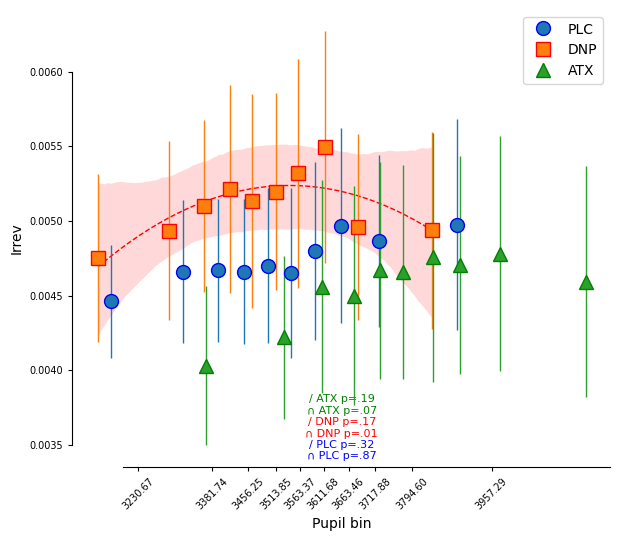

In [24]:
behavior = df
#behavior = remove_top_percentile(behavior, 'prestim_mean_alpha', 0.999)
#behavior = remove_top_percentile(behavior, 'poststim_mean_alpha', 0.999)
behavior = behavior[(behavior['poststim_irrev'] < 0.075) & (behavior['prestim_irrev'] < 0.075)]

behavior['irrev'] = behavior['bl_pupil']
cfg = {'n_bins': 10}  # Number of pupil bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    df_sdt_irreversibility['prestim_irrev'] = behavior.groupby(['subject','drug','irreversibility_bin']).mean()['prestim_irrev']
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['prestim_irrev'] < 0.05 or betas_second_irreversibility_plc['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_plc['prestim_irrev'] < betas_second_irreversibility_plc['prestim_irrev']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['prestim_irrev'] < betas_first_irreversibility_plc['prestim_irrev']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['prestim_irrev'] < 0.05 or betas_second_irreversibility_dnp['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_dnp['prestim_irrev'] < betas_second_irreversibility_dnp['prestim_irrev']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['prestim_irrev'] < betas_first_irreversibility_dnp['prestim_irrev']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['prestim_irrev'] < 0.05 or betas_second_irreversibility_atx['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_atx['prestim_irrev'] < betas_second_irreversibility_atx['prestim_irrev']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['prestim_irrev'] < betas_first_irreversibility_atx['prestim_irrev']:
        plot_quadratic_atx = True

# Plotting results for prestim_irrev'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="prestim_irrev", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_plc['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_dnp['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_atx['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('Irrev')
ax.set_xlabel('Pupil bin')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()


### Poststim

C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irrev'] = df['log_poststim']
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: PLC
Bin means: irreversibility_bin
0   -6.326569
1   -5.923116
2   -5.673400
3   -5.422491
4   -4.977585
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: DNP
Bin means: irreversibility_bin
0   -6.283927
1   -5.881107
2   -5.637365
3   -5.383775
4   -4.956327
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: ATX
Bin means: irreversibility_bin
0   -6.421300
1   -6.029099
2   -5.787192
3   -5.539990
4   -5.106399
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:55: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:58: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\726207482.py:62: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 

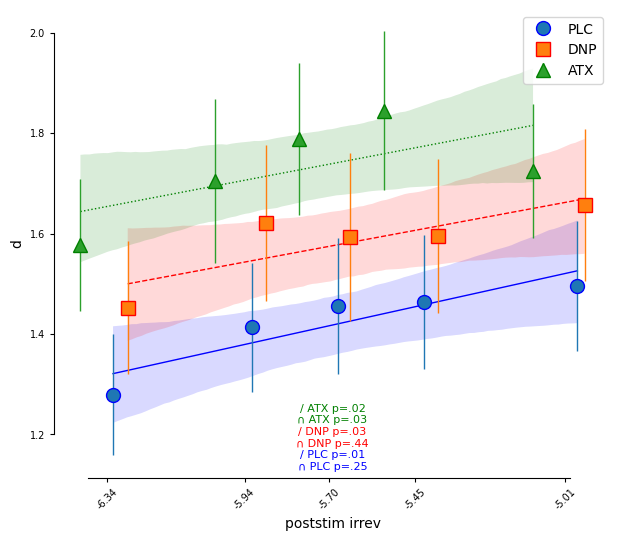

In [22]:
behavior = df
#behavior = remove_top_percentile(behavior, 'prestim_mean_alpha', 0.999)
#behavior = remove_top_percentile(behavior, 'poststim_mean_alpha', 0.999)
behavior = behavior[(behavior['poststim_irrev'] < 0.075) & (behavior['prestim_irrev'] < 0.075)]

behavior['irrev'] = df['log_poststim']
cfg = {'n_bins': 5}  # Number of pupil bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'd'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['d'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'd'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['d'] < 0.05 or betas_second_irreversibility_plc['d'] < 0.05:
    if betas_first_irreversibility_plc['d'] < betas_second_irreversibility_plc['d']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['d'] < betas_first_irreversibility_plc['d']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['d'] < 0.05 or betas_second_irreversibility_dnp['d'] < 0.05:
    if betas_first_irreversibility_dnp['d'] < betas_second_irreversibility_dnp['d']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['d'] < betas_first_irreversibility_dnp['d']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['d'] < 0.05 or betas_second_irreversibility_atx['d'] < 0.05:
    if betas_first_irreversibility_atx['d'] < betas_second_irreversibility_atx['d']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['d'] < betas_first_irreversibility_atx['d']:
        plot_quadratic_atx = True

# Plotting results for log_poststim'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['d']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['d']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['d']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['d']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="d", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['d']),
                                               p_val_string(betas_second_irreversibility_plc['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['d']),
                                               p_val_string(betas_second_irreversibility_dnp['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['d']),
                                               p_val_string(betas_second_irreversibility_atx['d'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('d')
ax.set_xlabel('poststim irrev')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()


In [ ]:
behavior['irrev'] = behavior['bl_pupil']
cfg = {'n_bins': 10}  # Number of pupil bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    df_sdt_irreversibility['prestim_irrev'] = behavior.groupby(['subject','drug','irreversibility_bin']).mean()['prestim_irrev']
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'prestim_irrev'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['prestim_irrev'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'prestim_irrev'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['prestim_irrev'] < 0.05 or betas_second_irreversibility_plc['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_plc['prestim_irrev'] < betas_second_irreversibility_plc['prestim_irrev']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['prestim_irrev'] < betas_first_irreversibility_plc['prestim_irrev']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['prestim_irrev'] < 0.05 or betas_second_irreversibility_dnp['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_dnp['prestim_irrev'] < betas_second_irreversibility_dnp['prestim_irrev']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['prestim_irrev'] < betas_first_irreversibility_dnp['prestim_irrev']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['prestim_irrev'] < 0.05 or betas_second_irreversibility_atx['prestim_irrev'] < 0.05:
    if betas_first_irreversibility_atx['prestim_irrev'] < betas_second_irreversibility_atx['prestim_irrev']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['prestim_irrev'] < betas_first_irreversibility_atx['prestim_irrev']:
        plot_quadratic_atx = True

# Plotting results for prestim_irrev'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['prestim_irrev']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['prestim_irrev']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="prestim_irrev", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_plc['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_dnp['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['prestim_irrev']),
                                               p_val_string(betas_second_irreversibility_atx['prestim_irrev'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('Irrev')
ax.set_xlabel('Pupil bin')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()


## In Irreversibility Bins, how much FASTER are validly cued correct trials? No faster...

C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: PLC
Bin means: irreversibility_bin
0   -6.473361
1   -6.156054
2   -5.989957
3   -5.855844
4   -5.733434
5   -5.620810
6   -5.497536
7   -5.360734
8   -5.176924
9   -4.809604
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: DNP
Bin means: irreversibility_bin
0   -6.471246
1   -6.128713
2   -5.973448
3   -5.840156
4   -5.722829
5   -5.604067
6   -5.472093
7   -5.333558
8   -5.155333
9   -4.789583
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()


Drug: ATX
Bin means: irreversibility_bin
0   -6.576446
1   -6.256369
2   -6.091220
3   -5.962498
4   -5.843051
5   -5.729879
6   -5.614081
7   -5.477015
8   -5.303184
9   -4.954458
Name: irrev, dtype: float64


C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:57: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_first_irreversibility_plc['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'RT'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:60: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  _, betas_second_irreversibility_plc['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'RT'), 0)
C:\Users\Jake\AppData\Local\Temp\ipykernel_18264\778333070.py:64: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in Sc

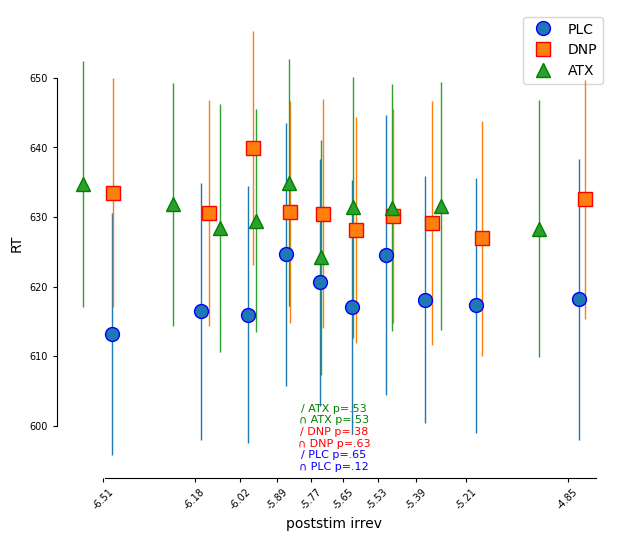

In [21]:
behavior = df
#behavior = remove_top_percentile(behavior, 'prestim_mean_alpha', 0.999)
#behavior = remove_top_percentile(behavior, 'poststim_mean_alpha', 0.999)
behavior = behavior[(behavior['poststim_irrev'] < 0.075) & (behavior['prestim_irrev'] < 0.075)]
behavior = behavior[(behavior['cue_val'] == 1)]
behavior = behavior[(behavior['correct'] == 1)]

behavior['irrev'] = behavior['log_poststim']
cfg = {'n_bins': 10}  # Number of bins

def process_behavior(behavior, drug):
    behavior = behavior[(behavior['drug'] == drug)]
    
    behavior['irreversibility_bin'] = behavior.groupby(['subject', 'session', 'block'])['irrev'].apply(lambda x: pd.qcut(x, cfg['n_bins'], labels=range(cfg['n_bins']))).to_numpy()

    correct_counts = True
    df_sdt_irreversibility = behavior.groupby(['subject', 'drug', 'irreversibility_bin']).apply(lambda x: sdt(x, correct_counts))
    df_sdt_irreversibility['RT'] = behavior.groupby(['subject','drug','irreversibility_bin']).mean()['RT']
    df_subject_irreversibility = df_sdt_irreversibility.groupby(['subject', 'irreversibility_bin']).mean()
    df_subject_irreversibility.reset_index(inplace=True)
    
    # Calculate the mean of each bin for x-axis labels
    bin_means = behavior.groupby('irreversibility_bin').mean()['irrev']
    print("Drug: " + drug)
    print("Bin means: " + str(bin_means))
    
    return df_subject_irreversibility, bin_means

# Process data for PLC
df_subject_irreversibility_plc, bin_means_plc = process_behavior(behavior, 'PLC')

# Process data for DNP
df_subject_irreversibility_dnp, bin_means_dnp = process_behavior(behavior, 'DNP')

# Process data for ATX
df_subject_irreversibility_atx, bin_means_atx = process_behavior(behavior, 'ATX')

total_bin_means = (bin_means_plc + bin_means_dnp + bin_means_atx) / 3

# Combine all data
df_combined = pd.concat([
    df_subject_irreversibility_plc.assign(drug='PLC', bin_mean=bin_means_plc[df_subject_irreversibility_plc['irreversibility_bin']].values),
    df_subject_irreversibility_dnp.assign(drug='DNP', bin_mean=bin_means_dnp[df_subject_irreversibility_dnp['irreversibility_bin']].values),
    df_subject_irreversibility_atx.assign(drug='ATX', bin_mean=bin_means_atx[df_subject_irreversibility_atx['irreversibility_bin']].values)
])

# Initialize variables to decide which model to plot
plot_linear_plc = False
plot_quadratic_plc = False
plot_linear_dnp = False
plot_quadratic_dnp = False
plot_linear_atx = False
plot_quadratic_atx = False

# Calculate betas for PLC
betas_first_irreversibility_plc = dict()
_, betas_first_irreversibility_plc['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 1, 'RT'), 0)

betas_second_irreversibility_plc = dict()
_, betas_second_irreversibility_plc['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_plc.groupby(['subject']).apply(run_model_irrevbin, 2, 'RT'), 0)

# Calculate betas for DNP
betas_first_irreversibility_dnp = dict()
_, betas_first_irreversibility_dnp['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 1, 'RT'), 0)

betas_second_irreversibility_dnp = dict()
_, betas_second_irreversibility_dnp['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_dnp.groupby(['subject']).apply(run_model_irrevbin, 2, 'RT'), 0)

# Calculate betas for ATX
betas_first_irreversibility_atx = dict()
_, betas_first_irreversibility_atx['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 1, 'RT'), 0)

betas_second_irreversibility_atx = dict()
_, betas_second_irreversibility_atx['RT'] = sp.stats.ttest_1samp(df_subject_irreversibility_atx.groupby(['subject']).apply(run_model_irrevbin, 2, 'RT'), 0)

# Determine which model to plot for PLC based on the significance and smaller p-value
if betas_first_irreversibility_plc['RT'] < 0.05 or betas_second_irreversibility_plc['RT'] < 0.05:
    if betas_first_irreversibility_plc['RT'] < betas_second_irreversibility_plc['RT']:
        plot_linear_plc = True
    elif betas_second_irreversibility_plc['RT'] < betas_first_irreversibility_plc['RT']:
        plot_quadratic_plc = True

# Determine which model to plot for DNP based on the significance and smaller p-value
if betas_first_irreversibility_dnp['RT'] < 0.05 or betas_second_irreversibility_dnp['RT'] < 0.05:
    if betas_first_irreversibility_dnp['RT'] < betas_second_irreversibility_dnp['RT']:
        plot_linear_dnp = True
    elif betas_second_irreversibility_dnp['RT'] < betas_first_irreversibility_dnp['RT']:
        plot_quadratic_dnp = True

# Determine which model to plot for ATX based on the significance and smaller p-value
if betas_first_irreversibility_atx['RT'] < 0.05 or betas_second_irreversibility_atx['RT'] < 0.05:
    if betas_first_irreversibility_atx['RT'] < betas_second_irreversibility_atx['RT']:
        plot_linear_atx = True
    elif betas_second_irreversibility_atx['RT'] < betas_first_irreversibility_atx['RT']:
        plot_quadratic_atx = True

# Plotting results for log_poststim'
cm = 1 / 2.54  # Conversion factor to cm
fig, ax = plt.subplots(figsize=(16*cm, 14*cm))

# PLC data
ym_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').mean()['RT']
yerr_plc = df_subject_irreversibility_plc.groupby('irreversibility_bin').sem()['RT']
ax.errorbar(bin_means_plc, ym_plc, yerr=yerr_plc, capsize=0, ls='None', marker='o', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='b', label='PLC')

# DNP data
ym_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').mean()['RT']
yerr_dnp = df_subject_irreversibility_dnp.groupby('irreversibility_bin').sem()['RT']
ax.errorbar(bin_means_dnp, ym_dnp, yerr=yerr_dnp, capsize=0, ls='None', marker='s', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='r', label='DNP')

# ATX data
ym_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').mean()['RT']
yerr_atx = df_subject_irreversibility_atx.groupby('irreversibility_bin').sem()['RT']
ax.errorbar(bin_means_atx, ym_atx, yerr=yerr_atx, capsize=0, ls='None', marker='^', alpha=1, zorder=1000, ms=10, mew=1, elinewidth=1, markeredgecolor='g', label='ATX')

# Plot linear/quadratic fit for each drug
def plot_fit(ax, df, color, linestyle, order):
    sns.regplot(ax=ax, data=df, x="bin_mean", y="RT", scatter=False, color=color,
                line_kws={'linestyle': linestyle, 'lw': 1}, order=order, ci=68)

# Optionally add model fits if linear/quadratic fit was significant for PLC
if plot_linear_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 1)
if plot_quadratic_plc:
    plot_fit(ax, df_combined[df_combined['drug'] == 'PLC'], 'b', '-', 2)

# Optionally add model fits if linear/quadratic fit was significant for DNP
if plot_linear_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 1)
if plot_quadratic_dnp:
    plot_fit(ax, df_combined[df_combined['drug'] == 'DNP'], 'r', '--', 2)

# Optionally add model fits if linear/quadratic fit was significant for ATX
if plot_linear_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 1)
if plot_quadratic_atx:
    plot_fit(ax, df_combined[df_combined['drug'] == 'ATX'], 'g', ':', 2)

# Plot p-values for the polynomial regression significance
ax.text(0.5, 0.01, '/ PLC {}\n∩ PLC {}'.format(p_val_string(betas_first_irreversibility_plc['RT']),
                                               p_val_string(betas_second_irreversibility_plc['RT'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='b')

ax.text(0.5, 0.06, '/ DNP {}\n∩ DNP {}'.format(p_val_string(betas_first_irreversibility_dnp['RT']),
                                               p_val_string(betas_second_irreversibility_dnp['RT'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='r')

ax.text(0.5, 0.11, '/ ATX {}\n∩ ATX {}'.format(p_val_string(betas_first_irreversibility_atx['RT']),
                                               p_val_string(betas_second_irreversibility_atx['RT'])), ha='center', va='bottom', transform=ax.transAxes, size=8, color='g')

sns.despine(ax=ax, offset=1, trim=True)

# Setting labels and titles
ax.set_ylabel('RT')
ax.set_xlabel('poststim irrev')

labels = []
for i in range(cfg['n_bins']):
    labels.append(f"{total_bin_means[i]:.2f}")

ax.set_xticks(total_bin_means)
ax.set_xticklabels(labels, rotation=45)
ax.tick_params(axis='both', which='major', labelsize=7, length=3)

ax.legend()
fig.tight_layout()
plt.show()
